In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import jenkspy
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

In [2]:
#!pip install jenkspy --proxy http://rie.proxy.national.agri:8080

In [2]:
def cascade(generateur, nb_iterations):
    fractal = generateur
    for i in range(nb_iterations):
        fractal = np.kron(fractal, generateur)
    return(fractal)

In [3]:
gen1 = np.array([[.5/8,.5/8,.5/8],[.5/8,.5,.5/8],[.5/8,.5/8,.5/8]])

In [4]:
test = cascade(gen1,5)

In [5]:
test.shape

(729, 729)

In [13]:
mpl.use('svg')  

cmap = mpl.cm.RdYlGn_r
bounds = np.quantile(test, np.arange(0,1,.005))
bounds = jenkspy.jenks_breaks(test.flatten()[np.random.choice(test.flatten().shape[0], 1000, replace=False)], n_classes=5)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
mpl.cm.ScalarMappable(norm=norm, cmap=cmap)


fig, ax = plt.subplots(figsize=(20,20))
plt.subplots_adjust(bottom=0, right=1, top=1, left=0)

ax.set_axis_off();
ax.imshow(cmap(norm(test)))
plt.savefig("multifractal.svg", format='svg', dpi=300)

In [27]:
mpl.cm.RdYlGn_r

array([1.00e-07, 2.00e-07, 4.00e-07, 8.00e-07, 1.60e-06, 3.20e-06,
       6.40e-06, 1.28e-05])

In [15]:
jenkspy.jenks_breaks(test.flatten()[np.random.choice(test.flatten().shape[0], 1000, replace=False)], n_classes=5)

[1.0000000000000004e-06,
 1.0000000000000004e-06,
 2.0000000000000008e-06,
 4.0000000000000015e-06,
 8.000000000000003e-06,
 1.6000000000000006e-05]

In [7]:
x = [0,1,2]
y = [0,1,2]
temp = [np.tile(x, len(y))*3, np.repeat(y, len(x))*3]

In [9]:
temp[0]

array([0, 3, 6, 0, 3, 6, 0, 3, 6])

In [21]:
first_level = pd.DataFrame({'x' : temp[0], 'y' : temp[1], 'i' :  (1+np.arange(9))})
first_level['Prob'] = 'P' + first_level.i.astype(str) 

In [22]:
size = 3
geometry = [ Polygon ([( x , y ) ,
                       ( x + size , y ) ,
                       ( x + size , y + size ) ,
                       (x , y + size ) ])
             for x , y in zip (first_level['x'] , first_level['y']) ]
first_level = gpd.GeoDataFrame(first_level, geometry = geometry , crs='EPSG:3035')

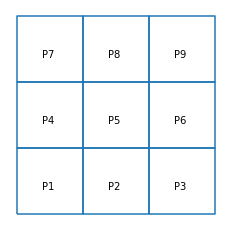

In [26]:
ax = first_level.boundary.plot()
ax.set_axis_off()

centroid = first_level.copy()
centroid['x'] = centroid.geometry.centroid.x
centroid['y'] = centroid.geometry.centroid.y

for x, y, label in zip(centroid.x, centroid.y, centroid.Prob):
    ax.annotate(label, xy=(x-0.5, y-0.5), xytext=(3, 3), textcoords="offset points")
plt.savefig("multifractal.svg", format='svg', dpi=300)

In [ ]:
plt.savefig("multifractal.svg", format='svg', dpi=300)

In [13]:
first_level['prob'] = 'P' + first_level['i'].astype(str)

In [16]:
first_level.to_file('first_level.geojson', driver='GeoJSON')